In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from numpy import set_printoptions 
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, LabelEncoder, OrdinalEncoder, LabelBinarizer,LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  # Changed to classifier
from imblearn.over_sampling import SMOTE
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact, fixed,interactive, fixed, interact_manual

In [2]:
path = r"C:\Users\Administrator\Documents\weed_detect\Dataset\crop data.csv"

In [3]:
df = pd.read_csv(path)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2211,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,COFEE
2212,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2213,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2214,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2212 non-null   float64
 1   P            2213 non-null   float64
 2   K            2214 non-null   float64
 3   temperature  2213 non-null   float64
 4   humidity     2213 non-null   float64
 5   ph           2215 non-null   float64
 6   rainfall     2215 non-null   float64
 7   label        2216 non-null   object 
dtypes: float64(7), object(1)
memory usage: 138.6+ KB


In [5]:
df.isna().sum()

N              4
P              3
K              2
temperature    3
humidity       3
ph             1
rainfall       1
label          0
dtype: int64

In [6]:
for i in df.columns:
    print(i, df[i].unique())

N [ 90.  85.  60.  74.  78.  69.  94.  89.  68.  91.  93.  77.  88.  76.
  67.  83.  98.  66.  97.  84.  73.  92.  95.  99.  63.  62.  64.  82.
  79.  65.  75.  71.  72.  70.  86.  61.  81.  80.  nan 100.  87.  96.
  40.  23.  39.  22.  36.  32.  58.  59.  42.  28.  43.  27.  50.  25.
  31.  26.  54.  57.  49.  46.  38.  35.  52.  44.  24.  29.  20.  56.
  37.  51.  41.  34.  30.  33.  47.  53.  45.  48.  13.   2.  17.  12.
   6.  10.  19.  11.  18.  21.  16.   9.   1.   7.   8.   0.   3.   4.
   5.  14.  15.  55. 105. 108. 118. 101. 106. 109. 117. 114. 110. 112.
 111. 102. 116. 119. 107. 104. 103. 120. 113. 115. 133. 136. 126. 121.
 129. 122. 140. 131. 135. 123. 125. 139. 132. 127. 130. 134.]
P [ 42.  58.  55.  35.  37.  53.  54.  46.  56.  50.  48.  38.  45.  40.
  59.  41.  47.  49.  51.  57.  39.  43.  44.  60.  52.  36.  nan  72.
  67.  73.  70.  62.  74.  66.  63.  71.  78.  80.  68.  65.  77.  76.
  79.  61.  64.  69.  75.  24.  18.  26.  27.  25.  21.  30.  11.   5.
  10.   7. 

In [7]:
df['label'].replace(['RICE   ', 'rice  '], ['rice','rice'], inplace= True)
df['label'].replace(['chickpeea','chick pea', '   chickpea' ], ['chickpea','chickpea','chickpea'], inplace = True)
df['label'].replace(['kidney  beans', 'kidneyb eans'], ['kidneybeans','kidneybeans'], inplace = True)
df['label'].replace('musk  melon', 'muskmelon', inplace = True)
df['label'].replace(['CF', 'COFEE', 'coffee  '], ['coffee','coffee','coffee'], inplace = True)

In [8]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.duplicated().sum()

16

In [10]:
df.drop_duplicates(inplace= True)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2196.0,50.490893,36.914374,0.000000,21.000000,37.000000,84.000000,140.000000
P,2197.0,53.342740,32.971499,5.000000,28.000000,51.000000,68.000000,145.000000
K,2198.0,48.147407,50.670912,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2197.0,25.617883,5.065929,8.825675,22.770356,25.597049,28.562122,43.675493
humidity,2197.0,71.469892,22.275296,14.258040,60.242186,80.471527,89.984052,99.981876
ph,2199.0,6.469795,0.773973,3.504752,5.972052,6.425420,6.923776,9.935091
rainfall,2199.0,103.484111,54.962511,20.211267,64.563449,94.953353,124.308842,298.560117


In [12]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

<Axes: >

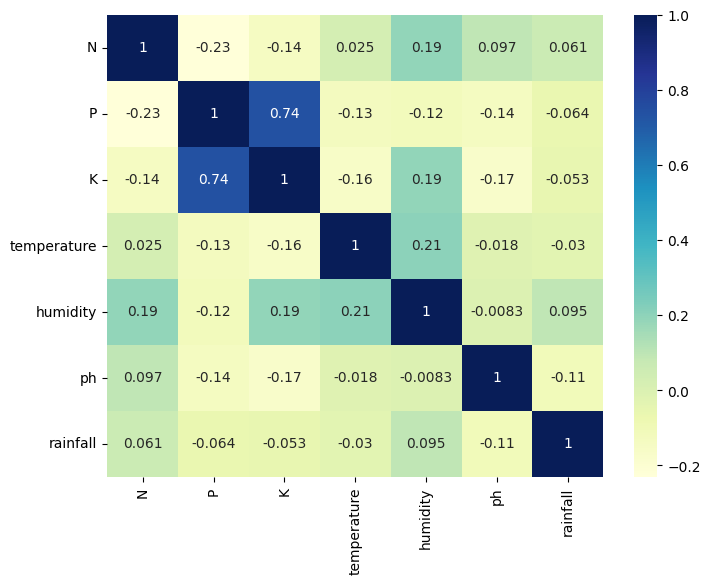

In [13]:
corr = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
plt.figure(figsize= [8,6])
sb.heatmap(corr, cmap= "YlGnBu", annot= True)

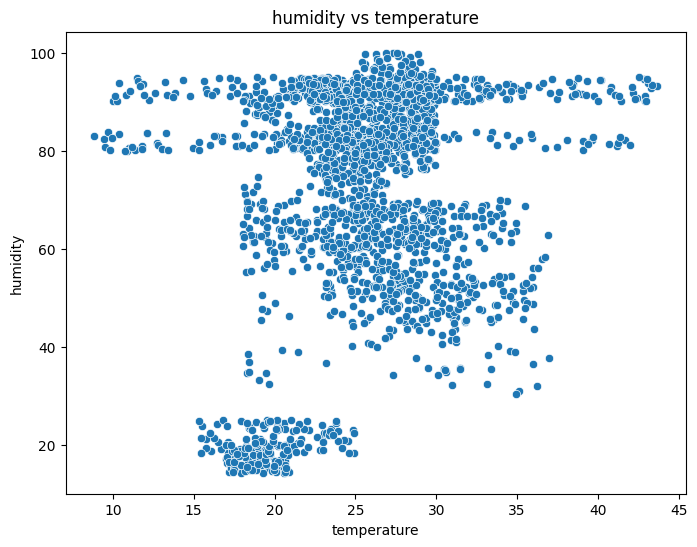

In [14]:
plt.figure(figsize=[8,6])
sb.scatterplot(data= df, x = 'temperature', y= 'humidity')
plt.title('humidity vs temperature')
plt.ylabel('humidity')
plt.xlabel('temperature');

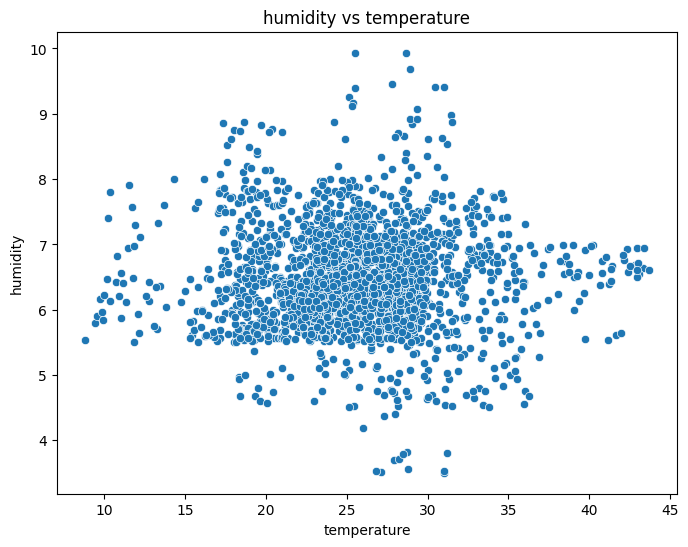

In [15]:
plt.figure(figsize=[8,6])
sb.scatterplot(data= df, x = 'temperature', y= 'ph')
plt.title('humidity vs temperature')
plt.ylabel('humidity')
plt.xlabel('temperature');

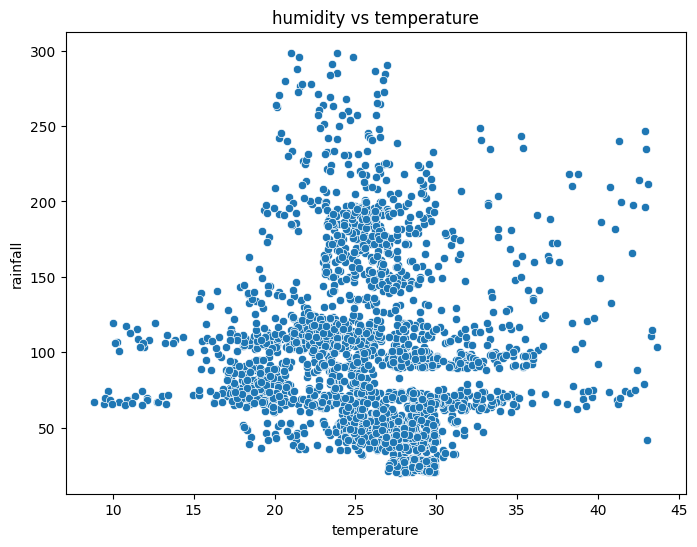

In [16]:
plt.figure(figsize=[8,6])
sb.scatterplot(data= df, x = 'temperature', y= 'rainfall')
plt.title('humidity vs temperature')
plt.ylabel('rainfall')
plt.xlabel('temperature');

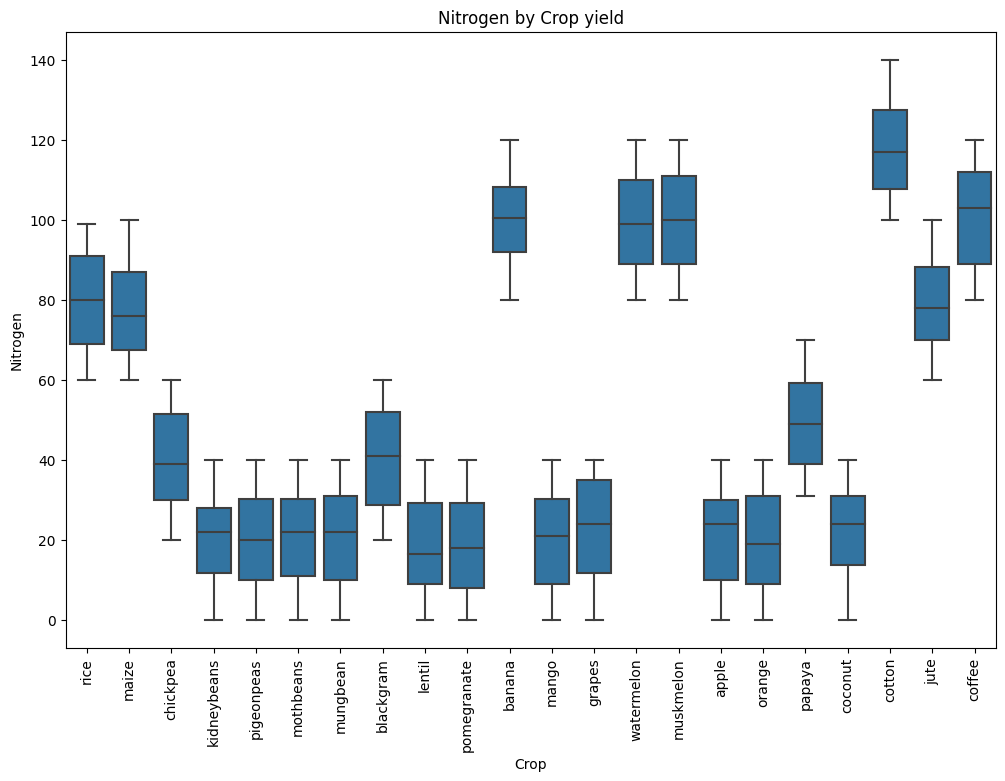

In [79]:
plt.figure(figsize= [12,8])
sb.boxplot(data= df, x = 'label', y= 'N', color= sb.color_palette()[0])
plt.title('Nitrogen by Crop yield')
plt.ylabel('Nitrogen')
plt.xlabel('Crop')
plt.xticks(rotation = 90);

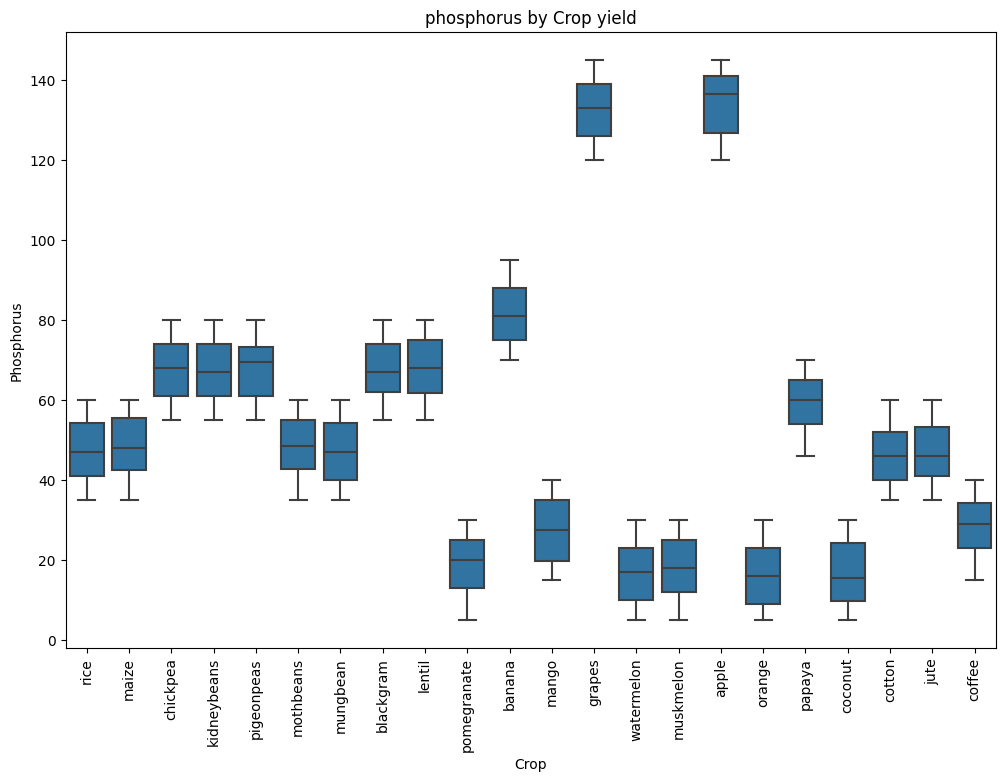

In [78]:
plt.figure(figsize= [12,8])
sb.boxplot(data= df, x = 'label', y= 'P', color= sb.color_palette()[0])
plt.title('phosphorus by Crop yield')
plt.ylabel('Phosphorus')
plt.xlabel('Crop')
plt.xticks(rotation = 90);

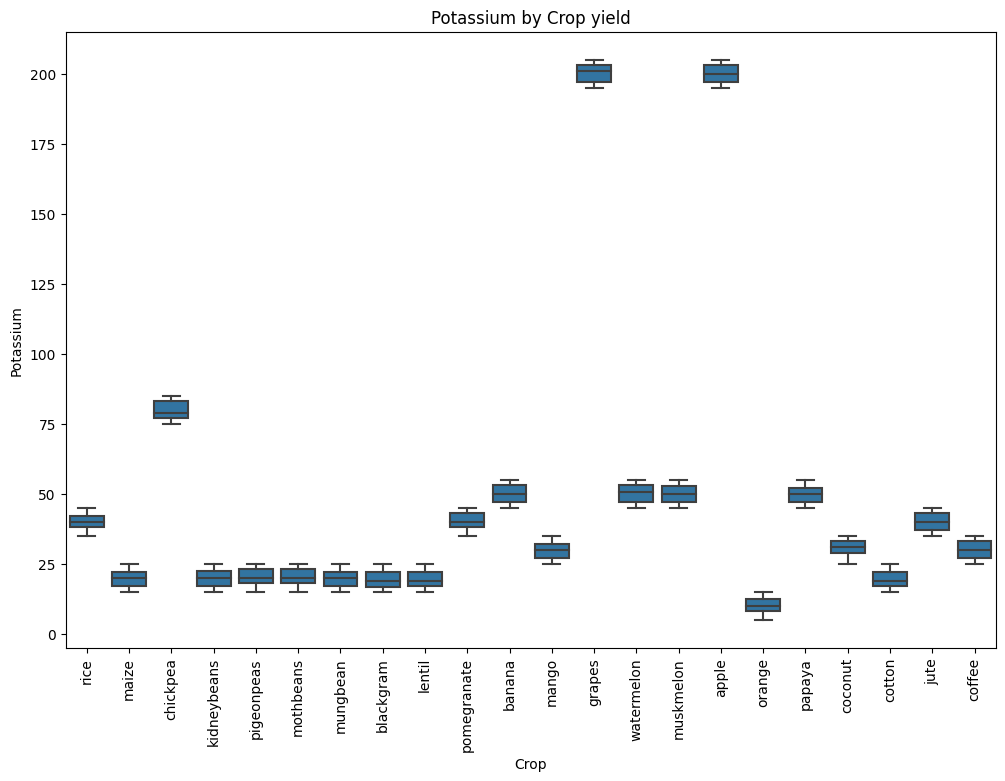

In [77]:
plt.figure(figsize= [12,8])
sb.boxplot(data= df, x = 'label', y= 'K', color= sb.color_palette()[0])
plt.title('Potassium by Crop yield')
plt.ylabel('Potassium')
plt.xlabel('Crop')
plt.xticks(rotation = 90);

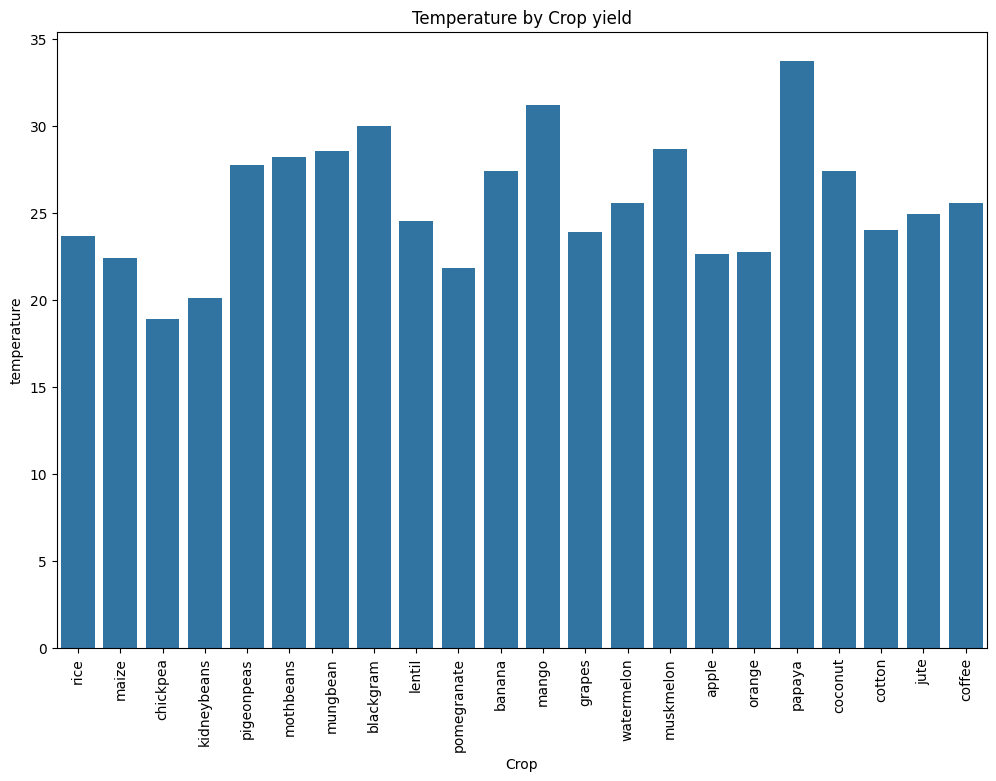

In [76]:
plt.figure(figsize= [12,8])
sb.barplot(data= df, x = 'label', y= 'temperature', color= sb.color_palette()[0], errorbar= None)
plt.title('Temperature by Crop Yield')
plt.xlabel('Crop')
plt.xticks(rotation = 90);

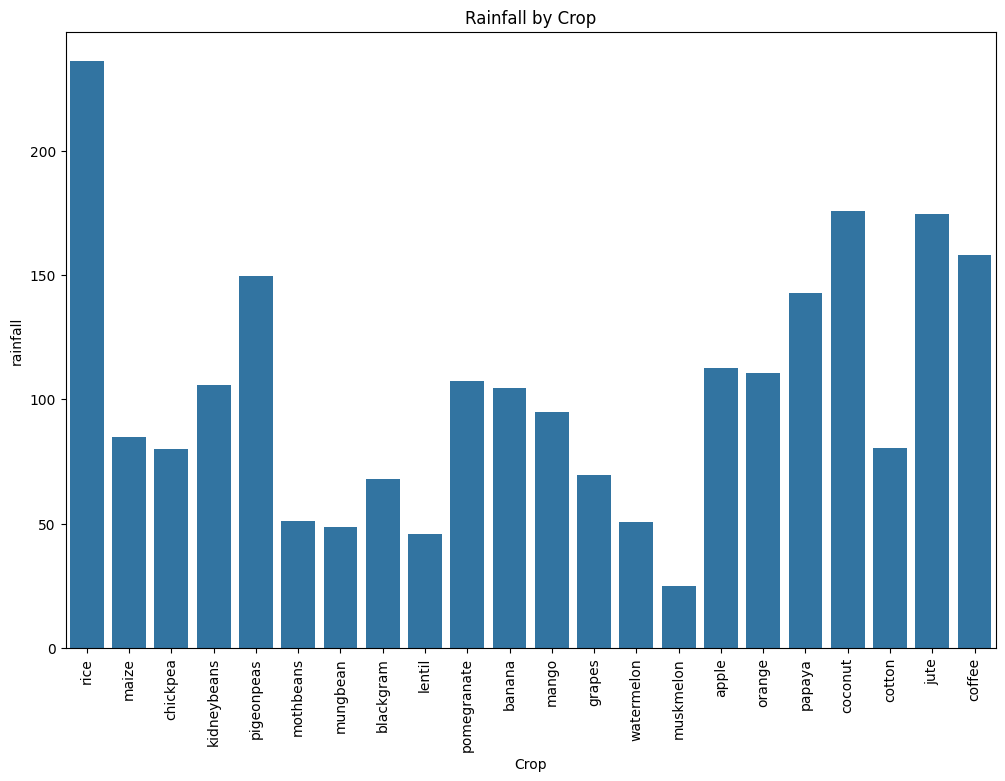

In [82]:
plt.figure(figsize= [12,8])
sb.barplot(data= df, x = 'label', y= 'rainfall', color= sb.color_palette()[0], errorbar= None)
plt.title('Rainfall by Crop')
plt.xlabel('Crop')
plt.xticks(rotation = 90);

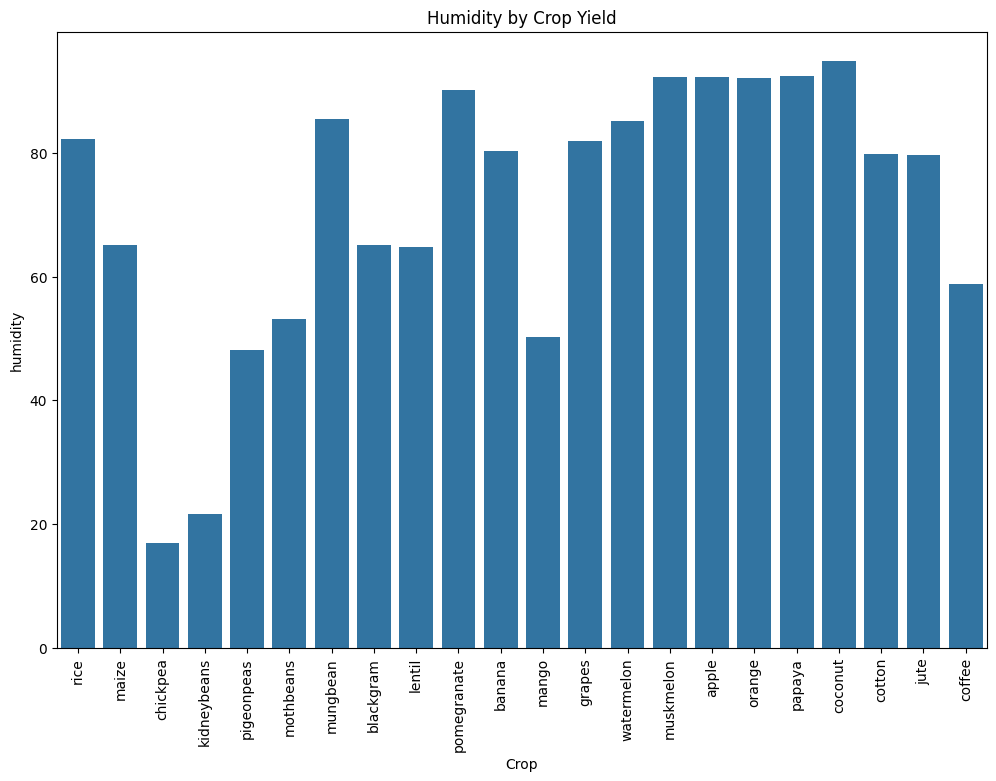

In [83]:
plt.figure(figsize= [12,8])
sb.barplot(data= df, x = 'label', y= 'humidity', color= sb.color_palette()[0], errorbar= None)
plt.title('Humidity by Crop Yield')
plt.xlabel('Crop')
plt.xticks(rotation = 90);

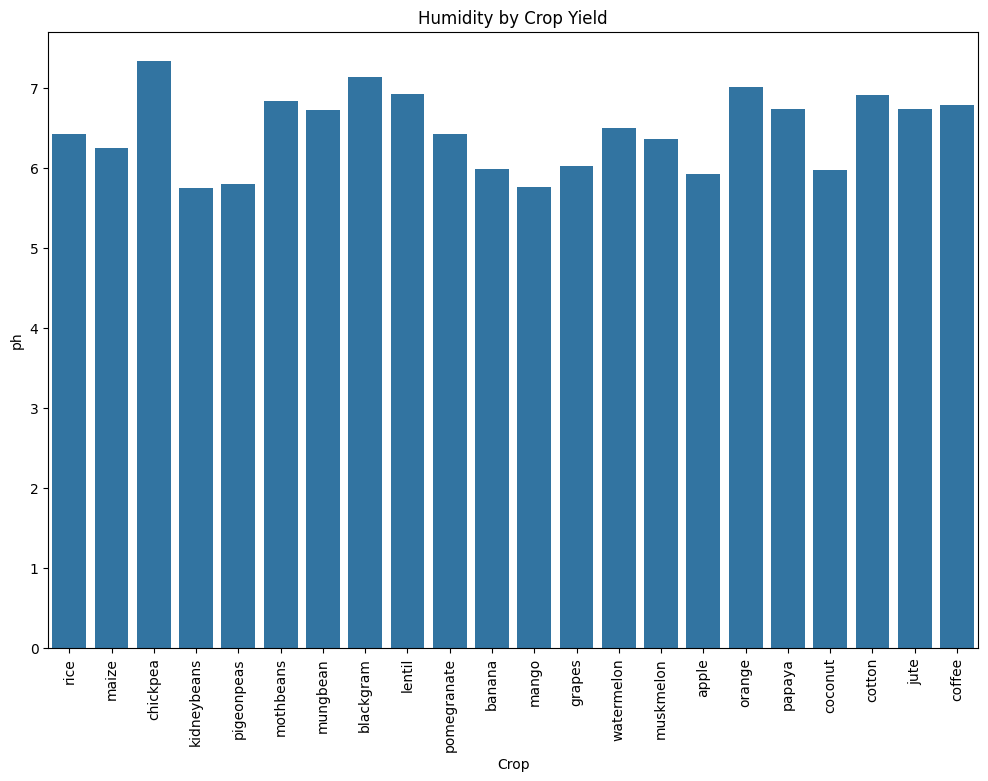

In [84]:
plt.figure(figsize= [12,8])
sb.barplot(data= df, x = 'label', y= 'ph', color= sb.color_palette()[0], errorbar= None)
plt.title('Humidity by Crop Yield')
plt.xlabel('Crop')
plt.xticks(rotation = 90);

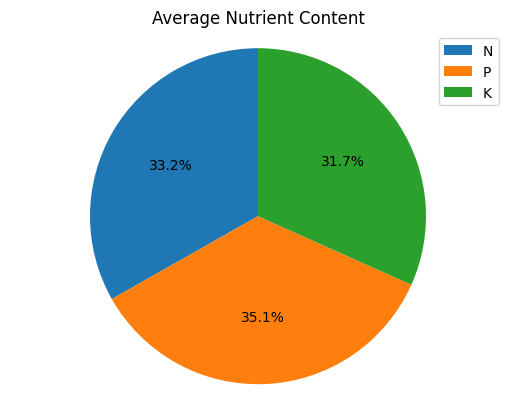

In [75]:
sizes = [df['N'].sum(), df['P'].sum(), df['K'].sum()]
labels = ['N', 'P', 'K']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Average Nutrient Content')
plt.legend(labels = labels)
plt.show()

- Cotton requires more nitrogen compare to other  crop.
- Apple requires more phosphorous compare to other  crop.
- Grapes and Apple requires most potassium compare to other  crop.
- Papaya requires highest temperature compare to other  crop.
- Coconut requires high humidity compare to other  crop.
- Chickpea requires high ph compare to other  crop.
- Rice requires most heavy rainfall compare to other  crop.

In [20]:
df2 = df.dropna()

In [21]:
df2.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [22]:
df2.duplicated().sum()

0

In [23]:
df2.drop_duplicates(inplace= True)

In [24]:
df2.duplicated().sum()

0

In [25]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2183.0,50.291342,36.821495,0.000000,21.000000,37.000000,84.000000,140.000000
P,2183.0,53.415025,32.919185,5.000000,28.000000,51.000000,68.000000,145.000000
K,2183.0,47.964727,50.526877,5.000000,20.000000,32.000000,48.000000,205.000000
temperature,2183.0,25.614235,5.069143,8.825675,22.762243,25.595353,28.565064,43.675493
humidity,2183.0,71.425431,22.285781,14.258040,60.187917,80.418180,89.989011,99.981876
ph,2183.0,6.470332,0.776411,3.504752,5.968996,6.425931,6.926608,9.935091
rainfall,2183.0,103.825225,54.995204,20.211267,64.777214,95.426260,124.607331,298.560117


In [26]:
df2.shape

(2183, 8)

In [27]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [28]:
df2.groupby('label').size()

label
apple          100
banana         100
blackgram      100
chickpea        99
coconut        100
coffee         100
cotton         100
grapes          97
jute           100
kidneybeans    100
lentil         100
maize           97
mango          100
mothbeans      100
mungbean       100
muskmelon       97
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon      93
dtype: int64

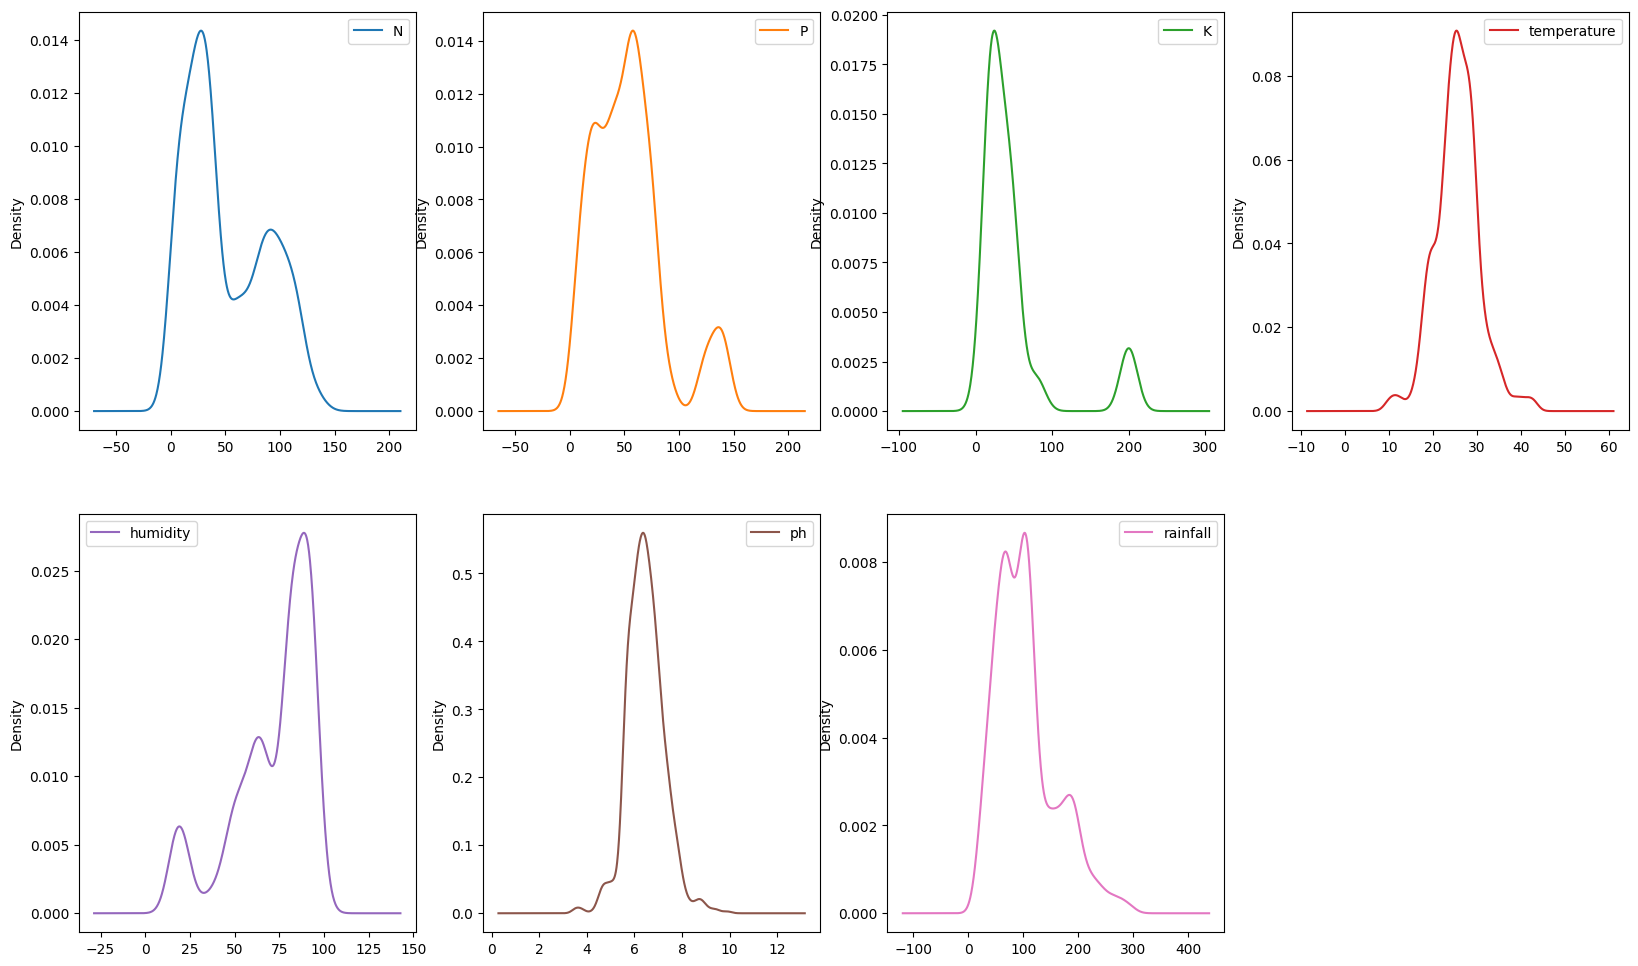

In [29]:
df2.plot(kind = 'density', subplots = True, layout = [4,4], sharex = False, sharey = False, figsize = [20,25]);

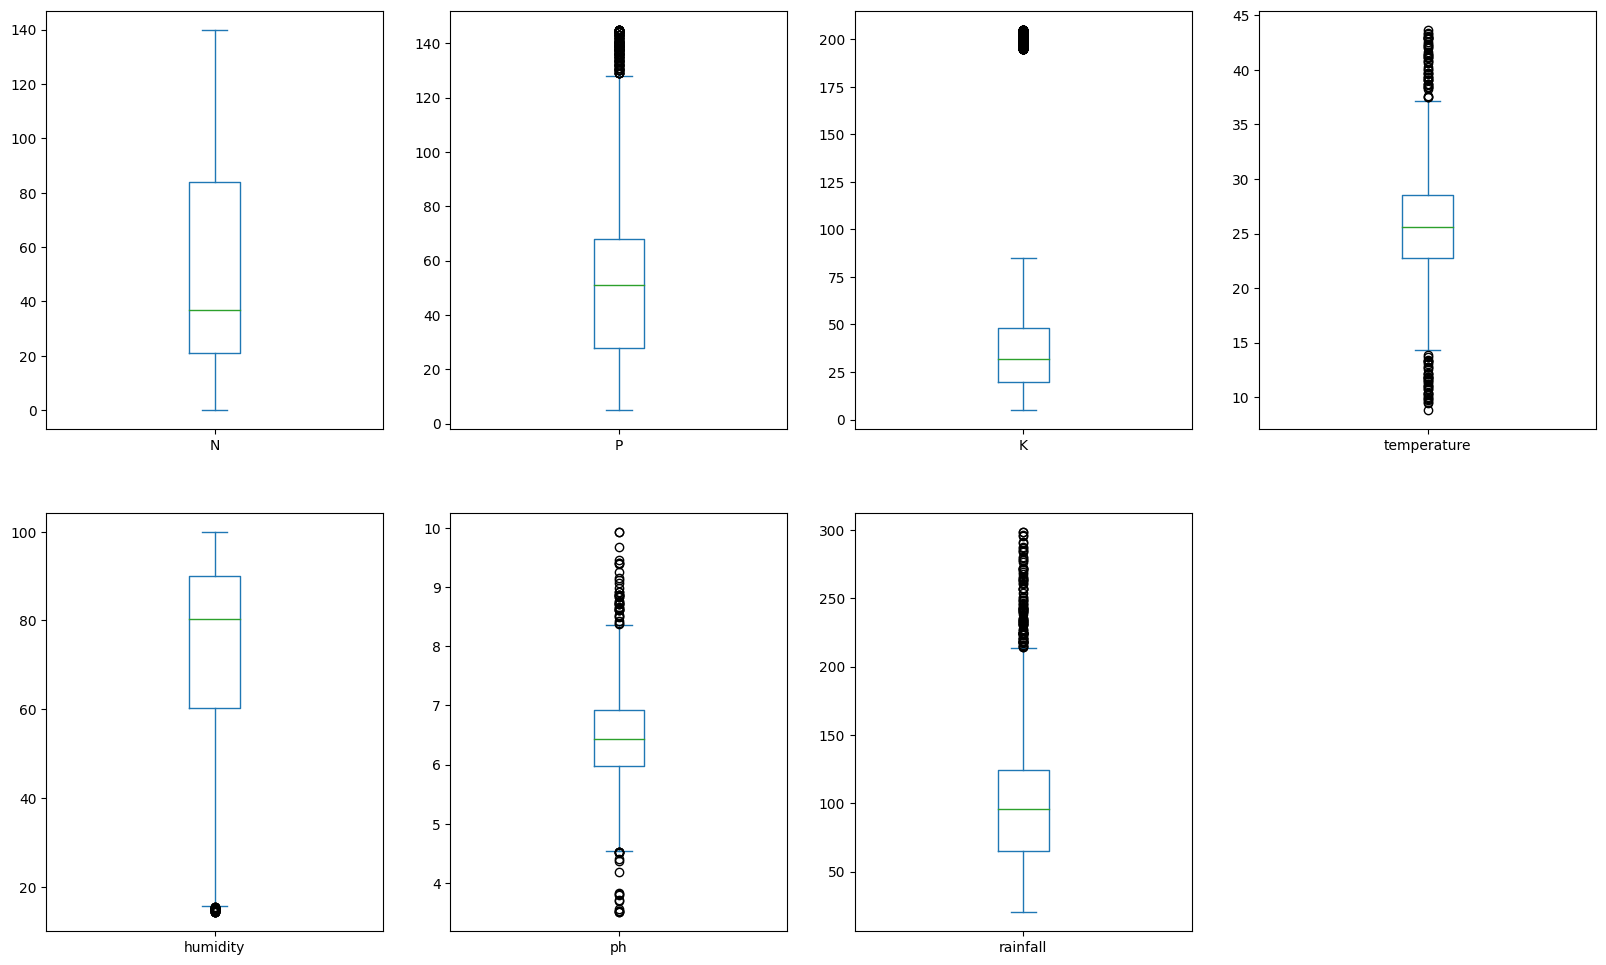

In [30]:
df2.plot(kind = 'box', subplots = True, layout = [4,4], sharex = False, sharey = False, figsize = [20,25]);

In [31]:
df2.groupby('label').size()

label
apple          100
banana         100
blackgram      100
chickpea        99
coconut        100
coffee         100
cotton         100
grapes          97
jute           100
kidneybeans    100
lentil         100
maize           97
mango          100
mothbeans      100
mungbean       100
muskmelon       97
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon      93
dtype: int64

In [32]:
df2.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

## Data Preprocessing

### Encoding

In [33]:
df3 =  df2.copy()

In [34]:
'''encoder = LabelEncoder()
encoded_label = encoder.fit_transform(transformed_df['label'])
encoded_df2 = transformed_df.assign(label = encoded_label)'''

"encoder = LabelEncoder()\nencoded_label = encoder.fit_transform(transformed_df['label'])\nencoded_df2 = transformed_df.assign(label = encoded_label)"

In [35]:
encoder = LabelEncoder()
encoded_label = encoder.fit_transform(df3['label'])
encoded_df2 = df3.assign(label = encoded_label)

In [36]:
encoded_df2

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,20
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,20
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,20
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,20
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2211,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,5
2212,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,5
2213,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,5
2214,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,5


In [37]:
X = encoded_df2.drop(columns= ['label']).values
y = encoded_df2['label'].values

In [38]:
encoded_df2.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [39]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
target = ['label']

## Splitting

In [40]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=7) 

In [41]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (1746, 7)
X_test shape (437, 7)
y_train shape (1746,)
y_test shape (437,)


## Rescaling

In [42]:
scaler = MinMaxScaler().fit(X_train)
X_trainR = scaler.transform(X_train)
X_testR = scaler.transform(X_test)

In [43]:
X_trainR_df = pd.DataFrame(X_trainR, columns= features)
X_trainR_df

,N,P,K,temperature,humidity,ph,rainfall
0,0.778571,0.050000,0.215,0.592027,0.908351,0.518908,0.001979
1,0.235714,0.392857,0.050,0.577508,0.786395,0.486856,0.130411
2,0.250000,0.978571,0.990,0.354240,0.886326,0.387168,0.371614
3,0.071429,0.385714,0.050,0.602721,0.875442,0.456597,0.138875
4,0.142857,0.450000,0.090,0.479886,0.579725,0.680636,0.154381
...,...,...,...,...,...,...,...
1741,0.192857,0.407143,0.360,0.268917,0.005281,0.497477,0.179525
1742,0.028571,0.057143,0.005,0.195308,0.933248,0.656960,0.291933
1743,0.257143,0.278571,0.080,0.467710,0.432480,0.163803,0.065657
1744,0.107143,0.857143,0.970,0.275506,0.773393,0.334356,0.178000


In [44]:
X_trainR_df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,1746.0,0.360305,0.262777,0.0,0.150000,0.264286,0.600000,1.0
P,1746.0,0.346032,0.236356,0.0,0.164286,0.328571,0.450000,1.0
K,1746.0,0.216578,0.253938,0.0,0.075000,0.135000,0.220000,1.0
temperature,1746.0,0.483273,0.146680,0.0,0.400052,0.481494,0.566537,1.0
humidity,1746.0,0.669653,0.260654,0.0,0.539136,0.773223,0.884698,1.0
ph,1746.0,0.480914,0.123506,0.0,0.400032,0.473776,0.553755,1.0
rainfall,1746.0,0.298608,0.196989,0.0,0.158188,0.269572,0.371567,1.0


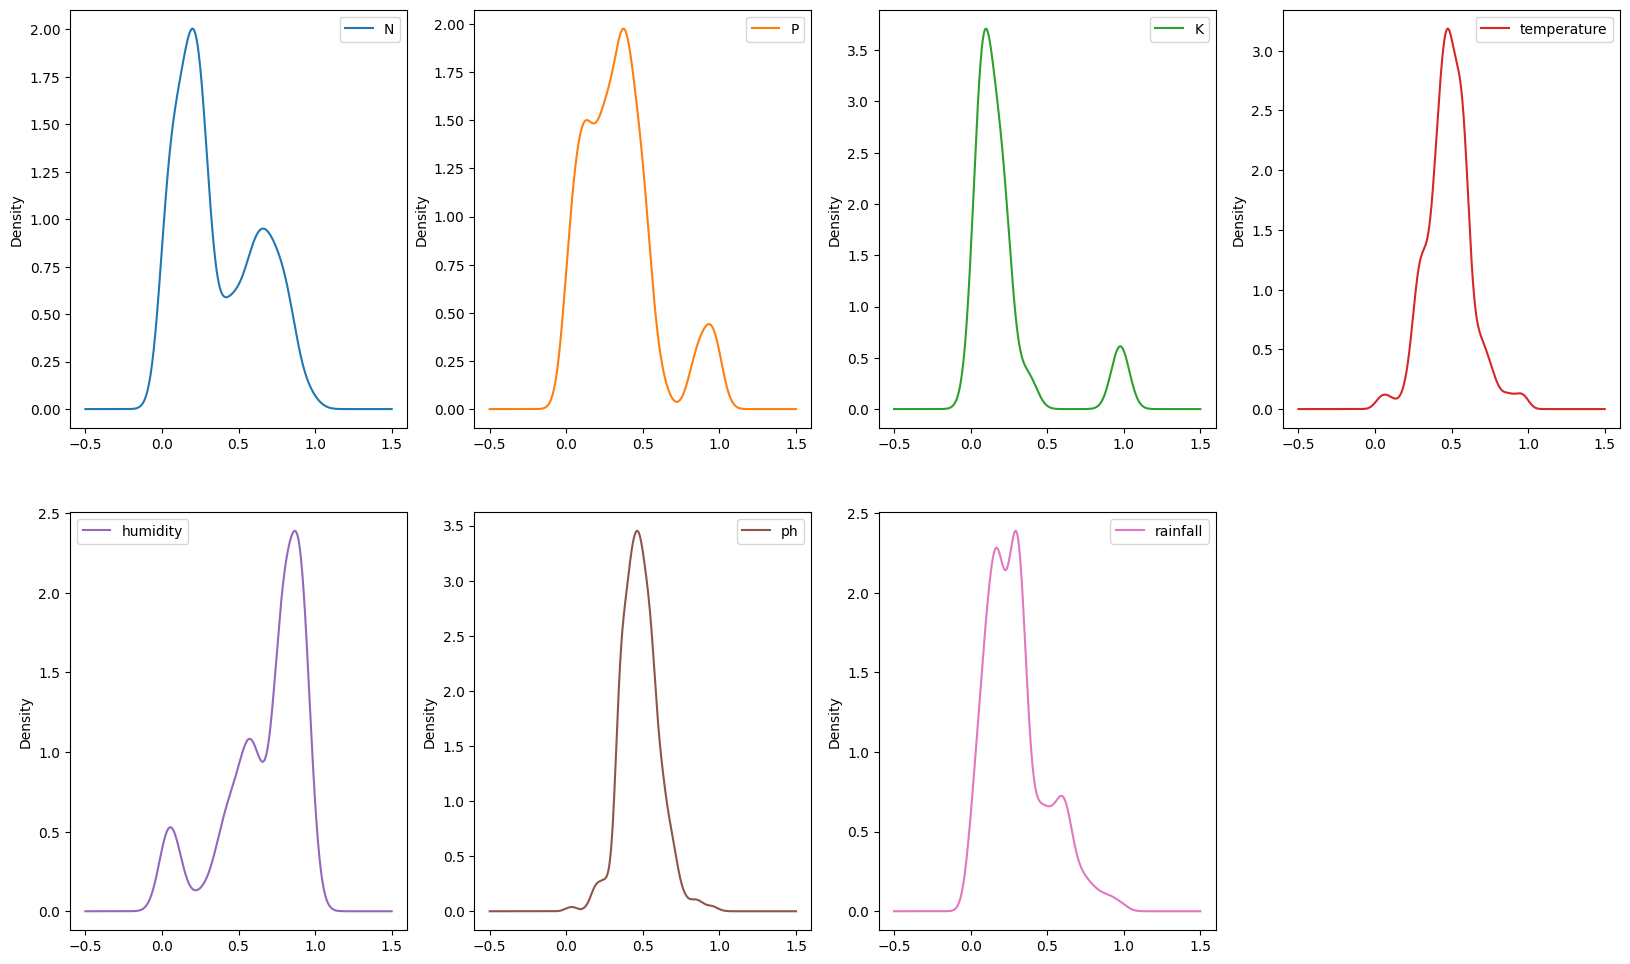

In [45]:
X_trainR_df.plot(kind = 'density', subplots = True, layout = [4,4], sharex = False, sharey = False, figsize = [20,25]);

## Normalizer

In [46]:
scaler = Normalizer().fit(X_trainR)
X_trainRN = scaler.transform(X_trainR)
X_testRN = scaler.transform(X_testR)

In [47]:
X_trainRN_df = pd.DataFrame(X_trainRN, columns= features)
X_trainRN_df

,N,P,K,temperature,humidity,ph,rainfall
0,0.537295,0.034505,0.148372,0.408560,0.626857,0.358101,0.001366
1,0.197921,0.329868,0.041983,0.484913,0.660308,0.408796,0.109502
2,0.139770,0.547101,0.553491,0.198049,0.495529,0.216459,0.207762
3,0.058054,0.313494,0.040638,0.489869,0.711526,0.371105,0.112872
4,0.126049,0.397054,0.079411,0.423423,0.511515,0.600553,0.136217
...,...,...,...,...,...,...,...
1741,0.233084,0.492066,0.435090,0.325008,0.006382,0.601242,0.216971
1742,0.023892,0.047785,0.004181,0.163323,0.780415,0.549373,0.244125
1743,0.335609,0.363577,0.104412,0.610430,0.564450,0.213787,0.085692
1744,0.067701,0.541608,0.612919,0.174085,0.488688,0.211271,0.112474


In [48]:
X_trainRN_df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,1746.0,0.282188,0.189540,0.0,0.126053,0.229101,0.460000,0.713167
P,1746.0,0.278973,0.171138,0.0,0.133625,0.254544,0.417428,0.738638
K,1746.0,0.158360,0.148532,0.0,0.071068,0.113993,0.160838,0.622229
temperature,1746.0,0.396193,0.127361,0.0,0.317788,0.383913,0.466851,0.821160
humidity,1746.0,0.521441,0.183299,0.0,0.466319,0.541726,0.641034,0.841590
ph,1746.0,0.396208,0.119865,0.0,0.315521,0.386716,0.469633,0.784854
rainfall,1746.0,0.241361,0.148318,0.0,0.115667,0.216540,0.342059,0.646355


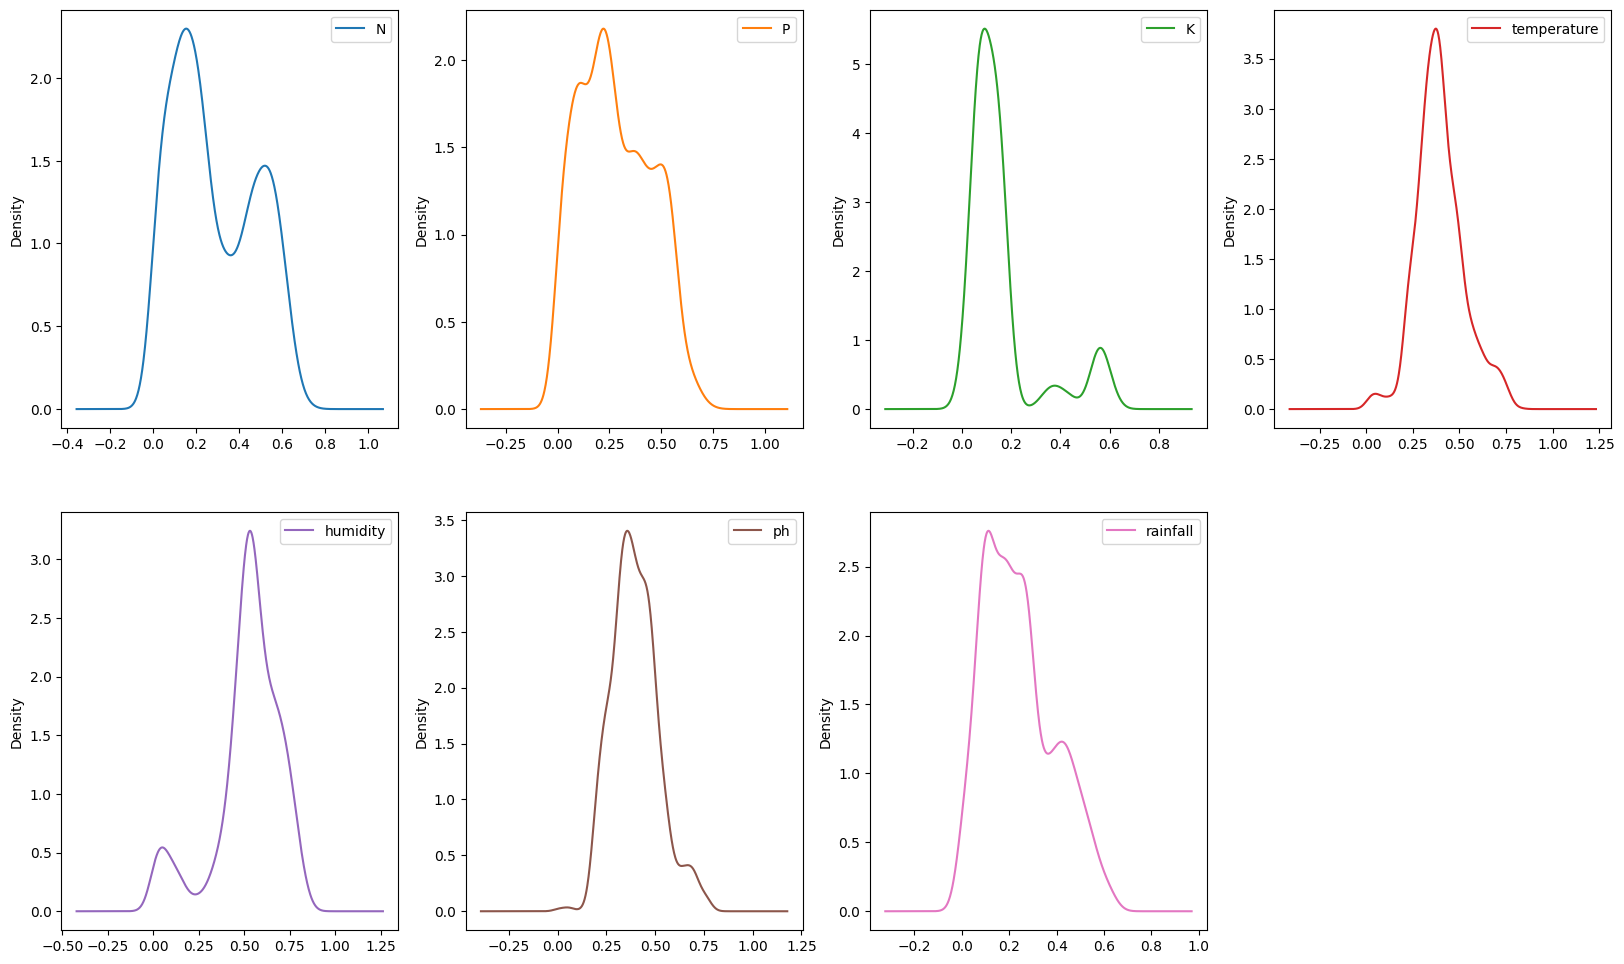

In [49]:
X_trainRN_df.plot(kind = 'density', subplots = True, layout = [4,4], sharex = False, sharey = False, figsize = [20,25]);

In [50]:
X_trainRN_dfLabel = X_trainRN_df.copy()
X_trainRN_dfLabel['label'] = y_train

In [51]:
X_trainRN_dfLabel

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.537295,0.034505,0.148372,0.408560,0.626857,0.358101,0.001366,15
1,0.197921,0.329868,0.041983,0.484913,0.660308,0.408796,0.109502,14
2,0.139770,0.547101,0.553491,0.198049,0.495529,0.216459,0.207762,0
3,0.058054,0.313494,0.040638,0.489869,0.711526,0.371105,0.112872,14
4,0.126049,0.397054,0.079411,0.423423,0.511515,0.600553,0.136217,2
...,...,...,...,...,...,...,...,...
1741,0.233084,0.492066,0.435090,0.325008,0.006382,0.601242,0.216971,3
1742,0.023892,0.047785,0.004181,0.163323,0.780415,0.549373,0.244125,16
1743,0.335609,0.363577,0.104412,0.610430,0.564450,0.213787,0.085692,13
1744,0.067701,0.541608,0.612919,0.174085,0.488688,0.211271,0.112474,7


In [52]:
X_trainRN_dfLabel.groupby('label').size()

label
0     82
1     80
2     74
3     82
4     77
5     73
6     82
7     77
8     80
9     79
10    81
11    78
12    75
13    81
14    81
15    79
16    81
17    85
18    78
19    84
20    80
21    77
dtype: int64

## Multicolinearity

<Axes: >

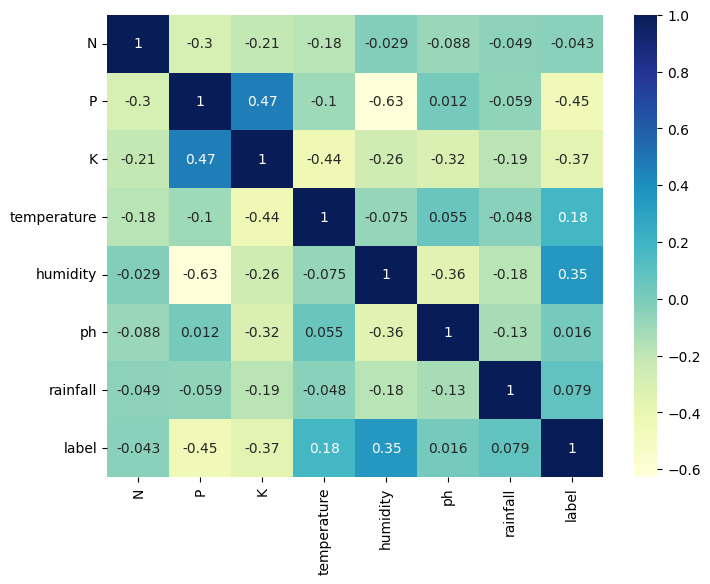

In [53]:
corr = X_trainRN_dfLabel.corr()
plt.figure(figsize= [8,6])
sb.heatmap(corr, cmap= "YlGnBu", annot= True)

In [54]:
X_train = X_trainRN
X_test = X_testRN

In [55]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [56]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.837911 (0.025356)
LDA: 0.935878 (0.021168)
KNN: 0.955356 (0.018705)
CART: 0.935307 (0.020571)
NB: 0.978821 (0.009580)
SVM: 0.962213 (0.016025)


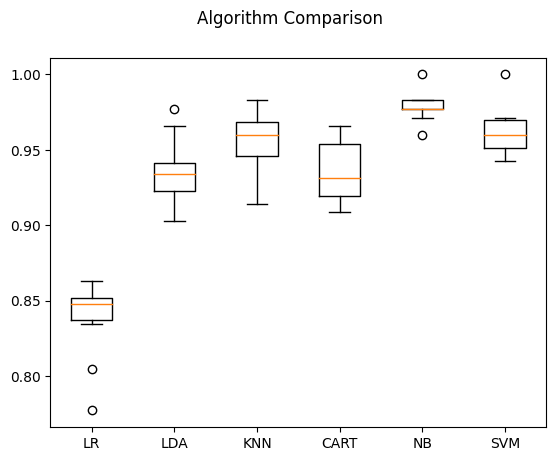

In [57]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [58]:
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [59]:
# Evaluate the model and print the results
print(classification_report(y_test, predictions))
print('F1-score: ', f1_score(y_test, predictions,average='micro'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        27
           6       0.86      1.00      0.92        18
           7       1.00      1.00      1.00        20
           8       0.95      0.95      0.95        20
           9       1.00      1.00      1.00        21
          10       0.95      1.00      0.97        19
          11       1.00      0.84      0.91        19
          12       1.00      1.00      1.00        25
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        19
          17       1.00    

In [60]:
df2.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [61]:
def make_prediction(Nitrogen, Phosphorus, Calcium, temperature, humidity, ph, rainfall):
    data = {
        'Nitrogen': Nitrogen,
        'Posphorus': Phosphorus,
        'Calcium': Calcium,
        'temperature': temperature,
        'humidity': humidity,
        'ph': ph,
        'rainfall': rainfall,
    }
    
    df = pd.DataFrame(data, index=[0])
    
    # Assuming model is your trained model
    prediction = model.predict(df)
    
    # Inverse transform the predicted labels
    decoded_prediction = encoder.inverse_transform(prediction)
    
    return f"The crop that will do well: {decoded_prediction[0]}"
 

In [62]:
make_prediction(999, 355, 3777, 777, 44, 2, 12)

'The crop that will do well: chickpea'

In [63]:
make_prediction(5, 10, 3, 777, 44, 2, 0)

'The crop that will do well: orange'